In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use("seaborn-v0_8-darkgrid")

In [147]:
df = pd.read_csv("../results/Delhi_Cleaned.csv", parse_dates=["ds"])
df = df.sort_values("ds").reset_index(drop=True)
df

,ds,Unnamed: 0,y,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3,week
0,2021-01-01 00:30:00,0,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,1999.076667,4
1,2021-01-01 00:35:00,1,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,1999.076667,4
2,2021-01-01 00:40:00,2,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667,4
3,2021-01-01 00:45:00,3,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667,4
4,2021-01-01 00:50:00,4,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,2024-12-12 00:10:00,393435,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,10,2174.893333,3
393436,2024-12-12 00:15:00,393436,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,15,2139.416667,3
393437,2024-12-12 00:20:00,393437,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,20,2115.423333,3
393438,2024-12-12 00:25:00,393438,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,25,2086.200000,3


In [148]:
# Aggegate Hourly (5-minute interval will be hard to interpret - too many points)

# Step 1: Ensure ds is the index
df_hourly = (
    df.set_index("ds")
      .resample("h")
      .agg({
          "y": "mean",
          "temp": "mean",
          "dwpt": "mean",
          "rhum": "mean",
          "wdir": "mean",
          "wspd": "mean",
          "pres": "mean"
      })
      .reset_index()
)

df_hourly

,ds,y,temp,dwpt,rhum,wdir,wspd,pres
0,2021-01-01 00:00:00,1975.541667,8.000000,6.90,93.000000,0.000000,0.0,1017.000000
1,2021-01-01 01:00:00,1805.590000,8.000000,6.90,93.000000,0.000000,0.0,1017.000000
2,2021-01-01 02:00:00,1665.914167,7.500000,6.25,92.000000,0.000000,0.0,1018.050000
3,2021-01-01 03:00:00,1607.331667,7.000000,6.30,95.500000,0.000000,0.0,1018.050000
4,2021-01-01 04:00:00,1676.528333,6.500000,6.50,100.000000,0.000000,0.0,1017.000000
...,...,...,...,...,...,...,...,...
34580,2024-12-11 20:00:00,3571.144167,14.200000,6.65,60.500000,264.000000,4.6,1018.650000
34581,2024-12-11 21:00:00,3318.907500,13.350000,6.70,64.000000,262.000000,3.7,1018.950000
34582,2024-12-11 22:00:00,3171.266667,12.966667,6.70,65.666667,263.666667,3.7,1019.066667
34583,2024-12-11 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df_hourly.isna().sum()

ds         0
y       1511
temp    1511
dwpt    1511
rhum    1511
wdir    1511
wspd    1511
pres    1511
dtype: int64

In [150]:
df_hourly = df_hourly.fillna(method="ffill").fillna(method="bfill")
df_hourly

C:\Users\hp\AppData\Local\Temp\ipykernel_28436\2727152224.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly = df_hourly.fillna(method="ffill").fillna(method="bfill")


,ds,y,temp,dwpt,rhum,wdir,wspd,pres
0,2021-01-01 00:00:00,1975.541667,8.000000,6.90,93.000000,0.000000,0.0,1017.000000
1,2021-01-01 01:00:00,1805.590000,8.000000,6.90,93.000000,0.000000,0.0,1017.000000
2,2021-01-01 02:00:00,1665.914167,7.500000,6.25,92.000000,0.000000,0.0,1018.050000
3,2021-01-01 03:00:00,1607.331667,7.000000,6.30,95.500000,0.000000,0.0,1018.050000
4,2021-01-01 04:00:00,1676.528333,6.500000,6.50,100.000000,0.000000,0.0,1017.000000
...,...,...,...,...,...,...,...,...
34580,2024-12-11 20:00:00,3571.144167,14.200000,6.65,60.500000,264.000000,4.6,1018.650000
34581,2024-12-11 21:00:00,3318.907500,13.350000,6.70,64.000000,262.000000,3.7,1018.950000
34582,2024-12-11 22:00:00,3171.266667,12.966667,6.70,65.666667,263.666667,3.7,1019.066667
34583,2024-12-11 23:00:00,3171.266667,12.966667,6.70,65.666667,263.666667,3.7,1019.066667


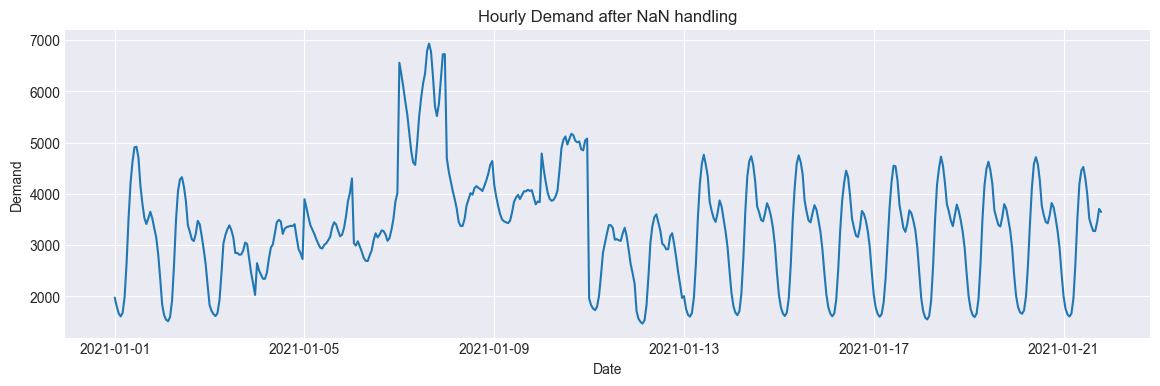

In [151]:
# Sanity Check.
# Should have Smooth Curve, No breaks, No spikes.
plt.figure(figsize=(14,4))
plt.plot(df_hourly["ds"][:500], df_hourly["y"][:500])
plt.title("Hourly Demand after NaN handling")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.show()

FEATURE INTELLIGENCE

In [152]:
# Time-Based Features
df_hourly["hour"] = df_hourly["ds"].dt.hour
df_hourly["weekday"] = df_hourly["ds"].dt.weekday
df_hourly["month"] = df_hourly["ds"].dt.month
df_hourly["is_weekend"] = df_hourly["weekday"].isin([5,6]).astype(int)

df_hourly

,ds,y,temp,dwpt,rhum,wdir,wspd,pres,hour,weekday,month,is_weekend
0,2021-01-01 00:00:00,1975.541667,8.000000,6.90,93.000000,0.000000,0.0,1017.000000,0,4,1,0
1,2021-01-01 01:00:00,1805.590000,8.000000,6.90,93.000000,0.000000,0.0,1017.000000,1,4,1,0
2,2021-01-01 02:00:00,1665.914167,7.500000,6.25,92.000000,0.000000,0.0,1018.050000,2,4,1,0
3,2021-01-01 03:00:00,1607.331667,7.000000,6.30,95.500000,0.000000,0.0,1018.050000,3,4,1,0
4,2021-01-01 04:00:00,1676.528333,6.500000,6.50,100.000000,0.000000,0.0,1017.000000,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34580,2024-12-11 20:00:00,3571.144167,14.200000,6.65,60.500000,264.000000,4.6,1018.650000,20,2,12,0
34581,2024-12-11 21:00:00,3318.907500,13.350000,6.70,64.000000,262.000000,3.7,1018.950000,21,2,12,0
34582,2024-12-11 22:00:00,3171.266667,12.966667,6.70,65.666667,263.666667,3.7,1019.066667,22,2,12,0
34583,2024-12-11 23:00:00,3171.266667,12.966667,6.70,65.666667,263.666667,3.7,1019.066667,23,2,12,0


In [153]:
# Cyclical Encoding
# 0 & 23 are 1hr apart. But to ML it would be far (|23-0|=23) apart.
df_hourly["hour_sin"] = np.sin(2*np.pi*df_hourly["hour"]/24)
df_hourly["hour_cos"] = np.cos(2*np.pi*df_hourly["hour"]/24)
df_hourly[["hour", "hour_sin", "hour_cos"]]

,hour,hour_sin,hour_cos
0,0,0.000000,1.000000
1,1,0.258819,0.965926
2,2,0.500000,0.866025
3,3,0.707107,0.707107
4,4,0.866025,0.500000
...,...,...,...
34580,20,-0.866025,0.500000
34581,21,-0.707107,0.707107
34582,22,-0.500000,0.866025
34583,23,-0.258819,0.965926


In [154]:
# Lag Features
df_hourly["lag_1"] = df_hourly["y"].shift(1)
df_hourly["lag_24"] = df_hourly["y"].shift(24)
df_hourly["lag_168"] = df_hourly["y"].shift(168)

df_hourly[["y", "lag_1", "lag_24", "lag_168"]]

,y,lag_1,lag_24,lag_168
0,1975.541667,NaN,NaN,NaN
1,1805.590000,1975.541667,NaN,NaN
2,1665.914167,1805.590000,NaN,NaN
3,1607.331667,1665.914167,NaN,NaN
4,1676.528333,1607.331667,NaN,NaN
...,...,...,...,...
34580,3571.144167,3888.460833,3597.426667,4167.754167
34581,3318.907500,3571.144167,3724.404167,4096.843333
34582,3171.266667,3318.907500,3809.593333,4176.589167
34583,3171.266667,3171.266667,3809.593333,4169.019091


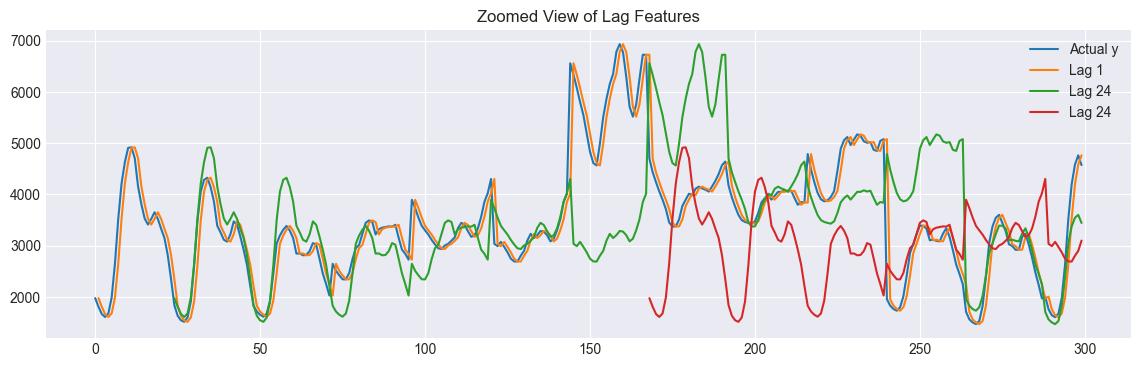

In [155]:
# Visualizing the lag.

plt.figure(figsize=(14,4))
plt.plot(df_hourly["y"].iloc[0:300], label="Actual y")
plt.plot(df_hourly["lag_1"].iloc[0:300], label="Lag 1")
plt.plot(df_hourly["lag_24"].iloc[0:300], label="Lag 24")
plt.plot(df_hourly["lag_168"].iloc[0:300], label="Lag 24")
plt.legend()
plt.title("Zoomed View of Lag Features")
plt.show()


In [156]:
# Rolling Features (Smoothing)

df_hourly["rolling_mean_3"] = df_hourly["y"].shift(1).rolling(window=3).mean()
df_hourly["rolling_mean_24"] = df_hourly["y"].shift(1).rolling(window=24).mean()

df_hourly

,ds,y,temp,dwpt,rhum,wdir,wspd,pres,hour,weekday,month,is_weekend,hour_sin,hour_cos,lag_1,lag_24,lag_168,rolling_mean_3,rolling_mean_24
0,2021-01-01 00:00:00,1975.541667,8.000000,6.90,93.000000,0.000000,0.0,1017.000000,0,4,1,0,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 01:00:00,1805.590000,8.000000,6.90,93.000000,0.000000,0.0,1017.000000,1,4,1,0,0.258819,0.965926,1975.541667,NaN,NaN,NaN,NaN
2,2021-01-01 02:00:00,1665.914167,7.500000,6.25,92.000000,0.000000,0.0,1018.050000,2,4,1,0,0.500000,0.866025,1805.590000,NaN,NaN,NaN,NaN
3,2021-01-01 03:00:00,1607.331667,7.000000,6.30,95.500000,0.000000,0.0,1018.050000,3,4,1,0,0.707107,0.707107,1665.914167,NaN,NaN,1815.681944,NaN
4,2021-01-01 04:00:00,1676.528333,6.500000,6.50,100.000000,0.000000,0.0,1017.000000,4,4,1,0,0.866025,0.500000,1607.331667,NaN,NaN,1692.945278,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34580,2024-12-11 20:00:00,3571.144167,14.200000,6.65,60.500000,264.000000,4.6,1018.650000,20,2,12,0,-0.866025,0.500000,3888.460833,3597.426667,4167.754167,4001.366944,3523.645417
34581,2024-12-11 21:00:00,3318.907500,13.350000,6.70,64.000000,262.000000,3.7,1018.950000,21,2,12,0,-0.707107,0.707107,3571.144167,3724.404167,4096.843333,3849.409167,3522.550312
34582,2024-12-11 22:00:00,3171.266667,12.966667,6.70,65.666667,263.666667,3.7,1019.066667,22,2,12,0,-0.500000,0.866025,3318.907500,3809.593333,4176.589167,3592.837500,3505.654618
34583,2024-12-11 23:00:00,3171.266667,12.966667,6.70,65.666667,263.666667,3.7,1019.066667,23,2,12,0,-0.258819,0.965926,3171.266667,3809.593333,4169.019091,3353.772778,3479.057674


In [157]:
df_hourly = df_hourly.dropna().reset_index(drop=True)
df_hourly.isna().sum()

ds                 0
y                  0
temp               0
dwpt               0
rhum               0
wdir               0
wspd               0
pres               0
hour               0
weekday            0
month              0
is_weekend         0
hour_sin           0
hour_cos           0
lag_1              0
lag_24             0
lag_168            0
rolling_mean_3     0
rolling_mean_24    0
dtype: int64

MODEL TRAINING AND TESTING

In [158]:
# Time Based Splitting
split_idx = int(len(df_hourly)*0.8)
train_df = df_hourly.iloc[:split_idx]
test_df = df_hourly.iloc[split_idx:]

print("Train Shape: \n", train_df.shape)
print("Test Shape: \n", test_df.shape)

Train Shape: 
 (27533, 19)
Test Shape: 
 (6884, 19)


In [159]:
target = "y"
features = [
    "temp",
    "dwpt",
    "wdir",
    "wspd",
    "pres",
    "hour",
    "weekday",
    "month",
    "is_weekend",
    "hour_sin",
    "hour_cos",
    "lag_1",
    "lag_24",
    "lag_168",
    "rolling_mean_3",
    "rolling_mean_24",
]

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

In [160]:
train_df.to_csv("../results/Delhi_Hourly_train.csv", index=False)
test_df.to_csv("../results/Delhi_Hourly_test.csv", index=False)
print("Saved hourly train and test datasets.")

Saved hourly train and test datasets.
